# I. Introduction to python

## 1. An Introductory example

In [1]:
#Exercice 1

def factorial(n):
    if n == 0:
        return 1
    a = 1
    for i in range(2,n+1):
        a *= i
    return a

factorial(10)

3628800

A function that generates one draw of the binomial random variable $Y \sim Bin(n,p).$<br>
If $\textbf{U}$ is uniform on $(0,1)$ and $p \in (0,1)$, then the expression $U < p$ evaluates to True with probability $p$.

In [2]:
#Exercice 2

from numpy.random import uniform
def binomial_rv(n,p):
    return sum([uniform(0,1) < p for _ in range(n)])
for _ in range(100):
    print(binomial_rv(100,0.3),end=",")

29,30,27,43,33,25,25,39,25,33,24,31,27,33,32,28,31,31,29,21,26,22,27,27,26,30,34,26,26,31,26,34,23,34,27,33,30,31,26,35,31,27,32,36,34,25,32,27,37,28,24,24,27,29,31,30,35,20,37,39,28,36,35,31,27,24,34,31,34,34,37,32,23,28,22,29,31,31,34,30,29,29,31,41,38,28,31,21,32,36,22,28,28,30,26,34,26,29,27,29,

$\textbf{An approximation of $\pi$ using the Monte-Carlo simulation}.$

The main idea is to create a disk inscribed in a square, then randomly generate a lot of points. The proportion
of dots that are within the disk represent it's area, and because we know the radius of the disk, we can approximate $\pi$.

We will be creating an array containing many couples of variables representing the coordinates of each point,
then we calculate whether the point is within the disk or not.
Each point $(x,y)$ is a bivariate uniform random variable on the unit square, $(x,y)\in (0,1)^2$, and the disk is defined by
$$\left \{(x,y)\in \mathbb{R}^2 ; \left(x-\dfrac{1}{2}\right)^2 + \left(y-\dfrac{1}{2}\right)^2 \leq \left(\dfrac{1}{2}\right)^2 \right \}$$
The more points we have the better the approximation.

In [16]:
#Exercice 3

import numpy as np

def monte_carlo_pi(trials):
    b_uniform = ((np.random.uniform(0,1), np.random.uniform(0,1)) for _ in range(trials))
    s = sum(((x-0.5)**2 + (y-0.5)**2 <= 0.25 for x,y in b_uniform))
    return 4*s/trials
monte_carlo_pi(100000)

3.14308

A program that prints one realization of the following random device:

>- Flip an unbiased coin 10 times.
>- If 3 consecutive heads occur one or more times within this sequence, pay one dollar.
>- If not, pay nothing.

In [45]:
#Exercice 4

def random_device(flips=10,p=0.5): #You can change the number of flips and the probability of getting heads.
    results = [uniform(0,1) < p for _ in range(flips)] #A flip is simulated using the uniform distribution.
    counter = 0
    for e in results:
        if e==True:
            counter += 1
        else:
            counter = 0
        if counter == 3: #Once you have 3 consecutive heads, pay one dollar
            return f"pay 1 dollar: {results}"
    return f"pay 0 dollar: {results}"
random_device()    

'pay 1 dollar: [False, True, True, False, True, True, True, False, True, False]'

Simulation and plot of the correlated time series:<br>
$$\displaystyle{x_{t+1}=\alpha x_{t}+\epsilon_{t+1}} \hspace{1cm} s.t. \hspace{1cm} x_{0}=0 \hspace{1cm} and \hspace{1cm} t=0,\cdots,T$$
The sequence of shocks $\left\{\epsilon_{t} \right\}$ is assumed to be i.i.d and standard normal.

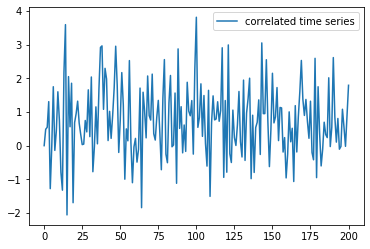

In [61]:
#Execrice 5

import matplotlib.pyplot as plt
%matplotlib inline

def c_time_series(x0=0,alpha=0.9,time_range=200):# initial values: alpha =0.9, x0=0 and T=200
    results = [x0]
    for i in range(time_range):
        results.append((lambda x:alpha*x + np.random.randn())(l[-1]))# randn() is equivalent to normal(0,1)
    return (range(time_range+1),results)# This way you can change the time range, x0 and alpha
plt.plot(*c_time_series(),label='correlated time series')# ploting  [x=0,...,T;y=x0,...,xT]
plt.legend()
plt.show()

A modulo randomness photo generated using the function in exercice 5

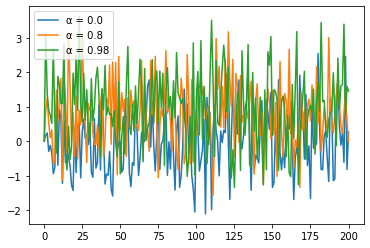

In [67]:
#Exercice 6

plt.plot(*c_time_series(alpha=0.0),label='α = 0.0')
plt.plot(*c_time_series(alpha=0.8),label='α = 0.8')
plt.plot(*c_time_series(alpha=0.98),label='α = 0.98')
plt.legend()
plt.show()

## 2. Python essentials

In [52]:
# Exercice 1

#part 1 (inner product of two lists)
from random import randrange

def inner_product(l1,l2):
    if len(l1) != len(l2):
        return "lists needs to be of same size"
    return sum(i*j for i,j in zip(l1,l2))
l1 = [randrange(0,20) for _ in range(10)]
l2 = [randrange(-10,10) for _ in range(10)]
print(inner_product(l1,l2))

#part 2 (count the number of even numbers within a sequence in one line)
print((lambda l:sum(i%2 == 0 for i in l))(range(10,110,3)))

#part 3 (given a pair ((a,b),(c,d),(e,f),...) count the number of pairs (x,y) such that both x and y are even)
l = ((2,4),(6,5),(8,8),(0,9),(13,12),(1,1),(4,160))
print((lambda l:sum([x%2 == 0 and y%2 == 0 for x,y in l]))(l))

-11
17
3
